<a href="https://colab.research.google.com/github/JaredGlaub/NeuralNetworks/blob/main/Final458.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import Statements

In [ ]:
!pip install gdown
!pip install contractions
!pip install transformers

     |████████████████████████████████| 321 kB 8.4 MB/s 
     |████████████████████████████████| 283 kB 62.3 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85440 sha256=2a50009c7867467f72241d2665b8444037cde9d023e7232d24e2562d806c71d5
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick
     |████████████████████████████████| 2.6 MB 8.2 MB/s 
     |████████████████████████████████| 636 kB 80.4 MB/s 
     |████████████████████████████████| 3.3 MB 63.1 MB/s 
     |████████████████████████████████| 895 kB 73.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# Helper libraries
import datetime
from packaging import version
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from collections import Counter

import gzip
import json
import re
import sys

import gdown
import numpy as np
import os
import pandas as pd
import time

# TensorFlow and tf.keras
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D
# from tensorflow.keras.layers import Dropout, Flatten, Input, Dense, BatchNormalization
import tensorflow_hub as hub

import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split

from transformers import BertTokenizer, TFBertForSequenceClassification, DistilBertTokenizer, DistilBertConfig, TFDistilBertModel
from transformers import InputExample, InputFeatures
import transformers as tr
import torch

# import libraries

from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score

from tensorflow.keras.models import Model, Sequential
# from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, LSTM, Conv2D, Conv1D, MaxPooling1D, Dense, Dropout, GlobalMaxPooling1D, Input, Bidirectional, concatenate, Flatten, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import plot_model

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

In [ ]:
print("This notebook requires TensorFlow 2.0 or above")
print("TensorFlow version: ", tf.__version__)
print("Keras version: ", keras.__version__)
assert version.parse(tf.__version__).release[0] >=2

This notebook requires TensorFlow 2.0 or above
TensorFlow version:  2.6.0
Keras version:  2.6.0


#### Connect Google Drive to Colab

In [ ]:
#Mount Google Drive to Colab Enviorment
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#Establish working directory
os.getcwd()
%cd /content/gdrive/MyDrive/458Data/Final/

/content/gdrive/MyDrive/458Data/Final


#### Preprocess according to Dataset Instructions

In [ ]:
DIR = './'
DIR_GENRE = './genre/'

In [ ]:
def load_data(file_name, head = 5000):
    count = 1
    data = []
    with gzip.open(file_name) as fin:
        for l in fin:
            d = json.loads(l)
            count += 1
            data.append(d)
            
            # break if reaches the 100th line
            if (head is not None) and (count > head):
                break
    return data

In [ ]:
reviews = load_data(os.path.join(DIR, 'goodreads_reviews_dedup.json.gz'))
np.random.choice(reviews)

{'book_id': '29056083',
 'date_added': 'Tue Aug 09 10:38:53 -0700 2016',
 'date_updated': 'Wed Aug 10 09:32:22 -0700 2016',
 'n_comments': 0,
 'n_votes': 0,
 'rating': 2,
 'read_at': 'Thu Aug 04 00:00:00 -0700 2016',
 'review_id': '0bc5640f507446f9f8f45c864cdb8f7c',
 'review_text': "** spoiler alert ** \n This book was very disappointing. There were many issues with the play. \n 1) The plot was all recycled from the previous novels. We've seen the Triwizard tournament before and been over how Harry's family died before and so on. \n 2) Harry potter books always offered a lesson to readers, and again this play's 'lesson' was one already learnt in Harry Potter and the Prisoner of Azkaban. \n 3) Characters were much weaker in comparison to their former selves, especially Ginny. \n 4) Stage directions of heart ache and so on hinted at a homosexual relationship. This would have been nice as the series heavily missed representations of the LGBT community. \n 5) Also, when was Bellatrix suppo

In [ ]:
# reviews[0]['review_text']

In [ ]:
len(reviews)

5000

In [ ]:
reviewText = pd.DataFrame(reviews).drop(columns=['date_added', 'date_updated', 'read_at', 'started_at', 'user_id'])
reviewText = reviewText[:4130]

In [ ]:
reviewText.head(1)

,book_id,review_id,rating,review_text,n_votes,n_comments
0,24375664,5cd416f3efc3f944fce4ce2db2290d5e,5,Mind blowingly cool. Best science fiction I've...,16,0


In [ ]:
data = reviewText.drop(columns=['book_id', 'review_id', 'n_votes', 'n_comments'])

In [ ]:
reviewText['review_text']

0       Mind blowingly cool. Best science fiction I've...
1       This is a special book. It started slow for ab...
2       I haven't read a fun mystery book in a while a...
3       Fun, fast paced, and disturbing tale of murder...
4       A fun book that gives you a sense of living in...
                              ...                        
4125    The nature / nurture question was presented to...
4126    I normally love Nelson Demille novels right fr...
4127    I was sad that there won't be more novels by t...
4128    I loved this book. I thought it was compelling...
4129    A delightful escapte into another time. Also a...
Name: review_text, Length: 4130, dtype: object

In [ ]:
train, test = train_test_split(data, test_size=0.10, random_state=1)

In [ ]:
train, valid = train_test_split(data, test_size=0.10, random_state=1)

In [ ]:
train = train.reset_index().drop(columns = ['index'])
valid = valid.reset_index().drop(columns = ['index'])
test = test.reset_index().drop(columns = ['index'])

In [ ]:
len(test)

413

In [ ]:
# reviewText['review_text'][4130]


In [ ]:
len(reviewText)

4130

In [ ]:
# manipulate descriptions into more usable strings
# training set
def stringBuilder(data_name):
  documents = []
  stemmer = WordNetLemmatizer()
  data_name['review_text'].reset_index().drop(columns = ['index'])
  length = len(data_name['review_text'])

  for sen in range(0, length):
      # Remove all the special characters
      document = re.sub(r'\W', ' ', str(data_name['review_text'][sen]))
      
      # remove all single characters
      document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
      
      # Remove single characters from the start
      # document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)
      
      # Substituting multiple spaces with single space
      document = re.sub(r'\s+', ' ', document, flags=re.I)

      # Converting to Lowercase
      document = document.lower()
      
      # Lemmatization
      document = document.split()

      document = [stemmer.lemmatize(word) for word in document]
      document = ' '.join(document)
      
      documents.append(document)
  data_name['review_text'] = documents
  return data_name

In [ ]:
cleanedTrain = stringBuilder(train)
cleanedValid = stringBuilder(valid)
cleanedTest = stringBuilder(test)

In [ ]:
# len(cleanedTrain['review_text'][3])
cleanedTrain['review_text'][1]

'yay book about adult love it accidental alpha is allison and wade story it can definitely be read a standalone but it is recommended your read is for alpha male the first book in the series the prologue punched me in the gut and couldn even imagine where this story would go but the author treat the serious subject with humor grace and lot of alpha steam and alison loved her and all of her insecurity m more wine than grape she declared suddenly bringing my hand to stop mid squeeze wa thrilled that wade wa there for allison and he wa all man all the time and he acted with honesty and truth right up front loved the dual pov which kept this book moving along at really fast pace read this in one sitting and really enjoyed it and wade d love more hero just like him funny sexy protective he the whole package wa she wearing bra it didn look like she wa wearing bra no joke if d ever doubted it before there wa no question now wa boob man an allison boob man roll tongue back in mouth do it now a

In [ ]:
train_examples = cleanedTrain['review_text']
train_labels = cleanedTrain['rating']

valid_examples = cleanedValid['review_text']
valid_labels = cleanedValid['rating']

test_examples = cleanedTest['review_text']
test_labels = cleanedTest['rating']

In [ ]:
# # initialize list for training times
# train_times = []

#### BERT


In [ ]:
def get_split(paragraph):
  total = []
  partial = []
  if len(paragraph.split())//150 >0: #divide by 150 remove remainder
    n = len(paragraph.split())//150
  else: 
    n = 1
  for w in range(n):
    if w == 0:
      partial = paragraph.split()[:200] #last portion
      total.append(" ".join(partial))
    else:
      partial = paragraph.split()[w*150:w*150 + 200] #split text and move position
      total.append(" ".join(partial))
  return total

In [ ]:
cleanedTrain["review_split"] = cleanedTrain['review_text'].apply(get_split)

In [ ]:
model_class, tokenizer_class, pretrained_weights = (tr.BertModel, tr.BertTokenizer, 'bert-base-uncased')

In [ ]:
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
tokenized = cleanedTrain['review_split'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [ ]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [ ]:
np.array(padded).shape

(3717, 13)

In [ ]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(3717, 13)

In [ ]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [ ]:
features = last_hidden_states[0][:,0,:].numpy()

In [ ]:
labels = cleanedTrain['rating']

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [ ]:
train_features, valid_features, train_labels, valid_labels = train_test_split(train_features, train_labels) 

In [ ]:
# halve the number of labels so 0,1 is a group and so on.
train_labels = np.where((train_labels <= 1), 0,train_labels) & np.where((train_labels >= 0), 0,train_labels)
train_labels = np.where((train_labels <= 3), 1,train_labels) & np.where((train_labels >= 2), 1,train_labels)
train_labels = np.where((train_labels <= 5), 2,train_labels) & np.where((train_labels >= 4), 2,train_labels)

valid_labels = np.where((valid_labels <= 1), 0,valid_labels) & np.where((valid_labels >= 0), 0,valid_labels)
valid_labels = np.where((valid_labels <= 3), 1,valid_labels) & np.where((valid_labels >= 2), 1,valid_labels)
valid_labels = np.where((valid_labels <= 5), 2,valid_labels) & np.where((valid_labels >= 4), 2,valid_labels)

test_labels = np.where((test_labels <= 1), 0,test_labels) & np.where((test_labels >= 0), 0,test_labels)
test_labels = np.where((test_labels <= 3), 1,test_labels) & np.where((test_labels >= 2), 1,test_labels)
test_labels = np.where((test_labels <= 5), 2,test_labels) & np.where((test_labels >= 4), 2,test_labels)

In [ ]:
ml_model = keras.Sequential([
                      tf.keras.layers.Reshape((1,768))       
                      ,tf.keras.layers.Dense(3, activation= 'softmax')
                      ])

In [ ]:
ml_model.compile(optimizer='nadam'
              ,loss=tf.keras.losses.SparseCategoricalCrossentropy() # if we set from_logits=True we do not have specify a softmax activation function in the last layer
              ,metrics=['accuracy'])

In [ ]:
ml_model_hist = ml_model.fit(train_features
                    ,train_labels   
                    ,epochs=20
                    ,validation_data=(valid_features,valid_labels)
                    ,batch_size = 15
                    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=2)]
                    )

Epoch 1/20
140/140 [==============================] - 3s 4ms/step - loss: 0.0379 - accuracy: 0.9923 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 2/20
140/140 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 3/20
140/140 [==============================] - 0s 3ms/step - loss: 5.8331e-04 - accuracy: 1.0000 - val_loss: 6.5232e-04 - val_accuracy: 1.0000
Epoch 4/20
140/140 [==============================] - 0s 3ms/step - loss: 3.6302e-04 - accuracy: 1.0000 - val_loss: 4.5956e-04 - val_accuracy: 1.0000


In [ ]:
test_loss, test_acc = ml_model.evaluate(test_features, test_labels)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

benchmarkacc = test_acc
benchmarkloss = test_loss

30/30 [==============================] - 0s 2ms/step - loss: 4.3947e-04 - accuracy: 1.0000
Test Loss: 0.0004394697898533195
Test Accuracy: 1.0


#### DistillBERT

In [ ]:
def get_split(text1):
  l_total = []
  l_parcial = []
  if len(text1.split())//150 >0:
    n = len(text1.split())//150
  else: 
    n = 1
  for w in range(n):
    if w == 0:
      l_parcial = text1.split()[:200]
      l_total.append(" ".join(l_parcial))
    else:
      l_parcial = text1.split()[w*150:w*150 + 200]
      l_total.append(" ".join(l_parcial))
  return l_total

In [ ]:
cleanedTrain["review_split"] = cleanedTrain['review_text'].apply(get_split)

In [ ]:
model_class, tokenizer_class, pretrained_weights = (tr.DistilBertModel, tr.DistilBertTokenizer, 'distilbert-base-uncased')

In [ ]:
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/442 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
tokenized = cleanedTrain['review_split'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [ ]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [ ]:
np.array(padded).shape

(3717, 13)

In [ ]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(3717, 13)

In [ ]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [ ]:
features = last_hidden_states[0][:,0,:].numpy()

In [ ]:
labels = cleanedTrain['rating']

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [ ]:
train_features, valid_features, train_labels, valid_labels = train_test_split(train_features, train_labels) 

#### Test 1

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_clf.fit(train_features, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_clf.score(test_features, test_labels)

0.3967741935483871

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

clf = DummyClassifier()

scores = cross_val_score(clf, train_features, train_labels)
print("Dummy classifier score: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Dummy classifier score: 0.304 (+/- 0.05)


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


#### Test 2

In [ ]:
model_6cats = keras.Sequential([
                      tf.keras.layers.Reshape((1,768))       
                      ,tf.keras.layers.Dense(6, activation= 'softmax')
                      ])

In [ ]:
model_6cats.compile(optimizer='nadam'
              ,loss=tf.keras.losses.SparseCategoricalCrossentropy() # if we set from_logits=True we do not have specify a softmax activation function in the last layer
              ,metrics=['accuracy'])

In [ ]:
model_6cats_hist = model_6cats.fit(train_features
                    ,train_labels   
                    ,epochs=20
                    ,validation_data=(valid_features,valid_labels)
                    ,batch_size = 15
                    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=2)]
                    )

Epoch 1/20
140/140 [==============================] - 1s 4ms/step - loss: 1.4316 - accuracy: 0.3651 - val_loss: 1.4255 - val_accuracy: 0.4189
Epoch 2/20
140/140 [==============================] - 0s 3ms/step - loss: 1.4082 - accuracy: 0.3746 - val_loss: 1.4054 - val_accuracy: 0.4319
Epoch 3/20
140/140 [==============================] - 0s 3ms/step - loss: 1.4086 - accuracy: 0.3737 - val_loss: 1.4240 - val_accuracy: 0.3085
Epoch 4/20
140/140 [==============================] - 0s 3ms/step - loss: 1.4086 - accuracy: 0.3684 - val_loss: 1.4278 - val_accuracy: 0.3085


#### Test 3

In [ ]:
# halve the number of labels so 0,1 is a group and so on.
train_labels = np.where((train_labels <= 1), 0,train_labels) & np.where((train_labels >= 0), 0,train_labels)
train_labels = np.where((train_labels <= 3), 1,train_labels) & np.where((train_labels >= 2), 1,train_labels)
train_labels = np.where((train_labels <= 5), 2,train_labels) & np.where((train_labels >= 4), 2,train_labels)

valid_labels = np.where((valid_labels <= 1), 0,valid_labels) & np.where((valid_labels >= 0), 0,valid_labels)
valid_labels = np.where((valid_labels <= 3), 1,valid_labels) & np.where((valid_labels >= 2), 1,valid_labels)
valid_labels = np.where((valid_labels <= 5), 2,valid_labels) & np.where((valid_labels >= 4), 2,valid_labels)

test_labels = np.where((test_labels <= 1), 0,test_labels) & np.where((test_labels >= 0), 0,test_labels)
test_labels = np.where((test_labels <= 3), 1,test_labels) & np.where((test_labels >= 2), 1,test_labels)
test_labels = np.where((test_labels <= 5), 2,test_labels) & np.where((test_labels >= 4), 2,test_labels)

In [ ]:
ml_model = keras.Sequential([
                      tf.keras.layers.Reshape((1,768))       
                      ,tf.keras.layers.Dense(3, activation= 'softmax')
                      ])

In [ ]:
ml_model.compile(optimizer='nadam'
              ,loss=tf.keras.losses.SparseCategoricalCrossentropy() # if we set from_logits=True we do not have specify a softmax activation function in the last layer
              ,metrics=['accuracy'])

In [ ]:
ml_model_hist = ml_model.fit(train_features
                    ,train_labels   
                    ,epochs=20
                    ,validation_data=(valid_features,valid_labels)
                    ,batch_size = 15
                    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=2)]
                    )

Epoch 1/20
140/140 [==============================] - 1s 4ms/step - loss: 0.0139 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 2/20
140/140 [==============================] - 0s 3ms/step - loss: 6.4723e-04 - accuracy: 1.0000 - val_loss: 3.9810e-04 - val_accuracy: 1.0000
Epoch 3/20
140/140 [==============================] - 0s 3ms/step - loss: 2.9743e-04 - accuracy: 1.0000 - val_loss: 2.1853e-04 - val_accuracy: 1.0000


In [ ]:
test_loss, test_acc = ml_model.evaluate(test_features, test_labels)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

benchmarkacc = test_acc
benchmarkloss = test_loss

30/30 [==============================] - 0s 2ms/step - loss: 2.3023e-04 - accuracy: 1.0000
Test Loss: 0.00023022577806841582
Test Accuracy: 1.0


#### BERT with AGNews

In [ ]:
# re-download dataset for new cleaning
!python -m tensorflow_datasets.scripts.download_and_prepare --register_checksums --datasets=ag_news_subset

dataset, info = tfds.load('ag_news_subset', with_info=True,  split=['train[:95%]','train[95%:]', 'test[:]'],
                          as_supervised=True)
train_dataset_AG, validation_dataset_AG, test_dataset_AG = dataset

2021-08-29 01:26:40.028721: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-29 01:26:40.355300: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-29 01:26:40.355949: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
I0829 01:26:40.356614 140504745355136 download_and_prepare.py:200] Running download_and_prepare for dataset(s):
ag_news_subset
2021-08-29 01:26:40.365271: I tensorflow/core/platform/cloud/google_auth_provider.cc:180] Attempting an empty bearer token since no token was retrieved from files, and GCE metadata check was skipped.
2021-08-29 01

INFO:absl:Load dataset info from /root/tensorflow_datasets/ag_news_subset/1.0.0
INFO:absl:Reusing dataset ag_news_subset (/root/tensorflow_datasets/ag_news_subset/1.0.0)
INFO:absl:Constructing tf.data.Dataset for split ['train[:95%]', 'train[95%:]', 'test[:]'], from /root/tensorflow_datasets/ag_news_subset/1.0.0


In [ ]:
train_AG = pd.DataFrame(tfds.as_dataframe(train_dataset_AG.take(len(train_dataset_AG)),info))
test_AG =  pd.DataFrame(tfds.as_dataframe(test_dataset_AG.take(len(test_dataset_AG)),info))

In [ ]:
# manipulate descriptions into more usable strings
def stringBuilderAG(data_name):
  documents = []
  stemmer = WordNetLemmatizer()
  data_name['description']
  length = len(data_name['description'])

  for sen in range(0, length):
      # Remove all the special characters
      document = re.sub(r'\W', ' ', str(data_name['description'][sen]))
      
      # remove all single characters
      document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
      
      # Remove single characters from the start
      document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)
      
      # Substituting multiple spaces with single space
      document = re.sub(r'\s+', ' ', document, flags=re.I)

      # Removing prefixed 'b'
      document = re.sub(r'^b\s+', '', document)
    
      # Removing quot
      document = re.sub(r'quot', '', document)

      # Removing 39
      document = re.sub(r'39', '', document)

      # Converting to Lowercase
      document = document.lower()
      
      # Lemmatization
      document = document.split()

      document = [stemmer.lemmatize(word) for word in document]
      document = ' '.join(document)
      
      documents.append(document)
  data_name['description'] = documents
  return data_name

In [ ]:
cleanedTrainAG = stringBuilderAG(train_AG)
cleanedTestAG = stringBuilderAG(test_AG)

In [ ]:
# cleanedTrainAG["review_split"] = cleanedTrainAG['description'].apply(get_split)
# cleanedTestAG["review_split"] = cleanedTestAG['description'].apply(get_split)

In [ ]:
# take fraction sample of original data
cleanedTrainAG = cleanedTrainAG.sample(frac = 0.05, random_state=1, replace=False)
cleanedValidAG = cleanedTrainAG.sample(frac = 0.05, random_state=1, replace=False)
cleanedTestAG = cleanedTestAG.sample(frac = 0.05, random_state=1, replace=False)

In [ ]:
from transformers import DistilBertTokenizer, DistilBertConfig, TFDistilBertModel
from tqdm import tqdm

maxlen = cleanedTrainAG['description'].map(lambda x: len(x.split())).max()

vocab_size = 20000
embed_size = 32
distil_bert = 'distilbert-base-uncased'

tokenizer = DistilBertTokenizer.from_pretrained(distil_bert, do_lower_case=True, add_special_tokens=True,
                                                max_length=maxlen, pad_to_max_length=True)

def tokenize(sentences, tokenizer):
    input_ids, input_masks, input_segments = [],[],[]

    for sentence in tqdm(sentences):
        inputs = tokenizer.encode_plus(sentence, add_special_tokens=True, max_length=maxlen, pad_to_max_length=True, 
                                             return_attention_mask=True, return_token_type_ids=True)
        input_ids.append(inputs['input_ids'])
        input_masks.append(inputs['attention_mask'])
        input_segments.append(inputs['token_type_ids'])        
    input_ids = tf.convert_to_tensor(input_ids)
    input_masks = tf.convert_to_tensor(input_masks)
    input_segments = tf.convert_to_tensor(input_segments)
    
    # return np.asarray(input_ids, dtype='int32'), np.asarray(input_masks, dtype='int32'), np.asarray(input_segments, dtype='int32')
    return input_ids, input_masks, input_segments

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/442 [00:00<?, ?B/s]

In [ ]:
# Tokenize desc and title train data
X_train = tokenize(cleanedTrainAG['description'], tokenizer)
x_valid = tokenize(cleanedValidAG['description'], tokenizer)
x_test = tokenize(cleanedTestAG['description'], tokenizer)

  0%|          | 0/5700 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2190: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
100%|██████████| 380/380 [00:00<00:00, 1194.63it/s]


In [ ]:
config = DistilBertConfig(dropout=0.2, attention_dropout=0.2)
config.output_hidden_states = False
transformer_model = TFDistilBertModel.from_pretrained(distil_bert, config=config)

input_ids_in = tf.keras.layers.Input(shape=(maxlen,), name='input_token', dtype='int32')
input_masks_in = tf.keras.layers.Input(shape=(maxlen,), name='masked_token', dtype='int32') 
input_segments_in = tf.keras.layers.Input(shape=(maxlen,), name='segment_token', dtype='int32')

embedding_layer = transformer_model(input_ids_in, attention_mask = input_masks_in)[0]
X = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(embedding_layer)
X = tf.keras.layers.GlobalMaxPool1D()(X)
X = tf.keras.layers.Dense(64, activation='relu')(X)
X = tf.keras.layers.Dropout(0.6)(X)
X = tf.keras.layers.Dense(4, activation='sigmoid')(X)
# X = layers.concatenate([input_ids_in, input_masks_in])
model = tf.keras.Model([input_ids_in, input_masks_in, input_segments_in], outputs = X)

for layer in model.layers[:3]:
    layer.trainable = False

model.summary()

Downloading:   0%|          | 0.00/363M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_layer_norm', 'activation_13', 'vocab_transform', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_token (InputLayer)        [(None, 155)]        0                                            
__________________________________________________________________________________________________
masked_token (InputLayer)       [(None, 155)]        0                                            
__________________________________________________________________________________________________
tf_distil_bert_model (TFDistilB TFBaseModelOutput(la 66362880    input_token[0][0]                
                                                                 masked_token[0][0]               
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 155, 128)     426496      tf_distil_bert_model[0][0]   

In [ ]:
embedding_layer

<KerasTensor: shape=(None, 155, 768) dtype=float32 (created by layer 'tf_distil_bert_model')>

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks = [
    ModelCheckpoint(
        filepath='weights.h5',
        monitor='val_accuracy', 
        mode='max', 
        save_best_only=True,
        save_weights_only=True,
        verbose=1
    )
]

In [ ]:
y_train = cleanedTrainAG['label']
y_valid = cleanedValidAG['label']
y_test = cleanedTestAG['label']

In [ ]:
len(X_train)

3

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_history = model.fit(X_train, y_train, batch_size=512, validation_data=(x_valid, y_valid), epochs=10, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)])

Epoch 1/10


12/12 [==============================] - ETA: 0s - loss: 0.9729 - accuracy: 0.6351WARNING:tensorflow:The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).


12/12 [==============================] - 43s 3s/step - loss: 0.9729 - accuracy: 0.6351 - val_loss: 0.4396 - val_accuracy: 0.8561
Epoch 2/10
12/12 [==============================] - 33s 3s/step - loss: 0.5267 - accuracy: 0.8321 - val_loss: 0.3333 - val_accuracy: 0.8877
Epoch 3/10
12/12 [==============================] - 35s 3s/step - loss: 0.4594 - accuracy: 0.8611 - val_loss: 0.3452 - val_accuracy: 0.8947
Epoch 4/10
12/12 [==============================] - 34s 3s/step - loss: 0.4367 - accuracy: 0.8609 - val_loss: 0.3043 - val_accuracy: 0.8982
Epoch 5/10
12/12 [==============================] - 34s 3s/step - loss: 0.4134 - accuracy: 0.8661 - val_loss: 0.3055 - val_accuracy: 0.9053
Epoch 6/10
12/12 [==============================] - 34s 3s/step - loss: 0.3950 - accuracy: 0.8786 - val_loss: 0.3119 - val_accuracy: 0.8982
Epoch 7/10
12/12 [==============================] - 34s 3s/step - loss: 0.3834 - accuracy: 0.8858 - val_loss: 0.2853 - val_accuracy: 0.9053


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

benchmarkacc = test_acc
benchmarkloss = test_loss

12/12 [==============================] - 2s 174ms/step - loss: 0.3830 - accuracy: 0.8816
Test Loss: 0.38302671909332275
Test Accuracy: 0.8815789222717285


In [ ]:
preds = model.predict(x_test)

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)
df = pd.DataFrame(preds[0:10],columns = ['World','Sports','Business','Sci/Tech'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

,World,Sports,Business,Sci/Tech
0,99.14%,6.29%,15.45%,12.16%
1,58.21%,99.25%,25.39%,10.19%
2,50.16%,5.41%,95.13%,35.89%
3,97.05%,9.55%,15.10%,25.85%
4,67.55%,99.42%,12.45%,9.92%
5,10.83%,6.87%,57.66%,96.62%
6,99.13%,6.08%,17.77%,10.59%
7,68.82%,99.36%,17.31%,6.83%
8,98.26%,6.36%,38.75%,11.97%
9,48.64%,6.38%,97.38%,32.65%


In [ ]:
history_dictionary = model_history.history
history_dictionary.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_dictionary_df=pd.DataFrame(history_dictionary)
history_dictionary_df.tail().round(3)

,loss,accuracy,val_loss,val_accuracy
2,0.459,0.861,0.345,0.895
3,0.437,0.861,0.304,0.898
4,0.413,0.866,0.306,0.905
5,0.395,0.879,0.312,0.898
6,0.383,0.886,0.285,0.905


In [ ]:
losses = model_history.history['loss']
accs = model_history.history['accuracy']
val_losses = model_history.history['val_loss']
val_accs = model_history.history['val_accuracy']
epochs = len(losses)

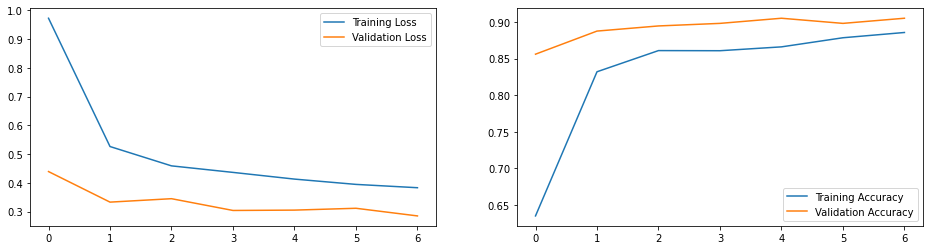

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

#### PCA for visualization

In [ ]:
# Extracts the outputs of the 2 layers:
layer_outputs = [layer.output for layer in model.layers]

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

print(f"There are {len(layer_outputs)} layers")
layer_outputs; # description of the layers

There are 9 layers


In [ ]:
# Get the outputs of all the hidden nodes for each of the 60000 training images
activations = activation_model.predict(X_train)
hidden_layer_activation = activations[0]
output_layer_activations = activations[1]
hidden_layer_activation.shape   #  each of the 128 hidden nodes has one activation value per training image

(5700, 155)

In [ ]:
output_layer_activations.shape

(5700, 155)

In [ ]:
print(f"The maximum activation value of the hidden nodes in the hidden layer is \
{hidden_layer_activation.max()}")

The maximum activation value of the hidden nodes in the hidden layer is 29599


In [ ]:
# Some stats about the output layer as an aside...
np.set_printoptions(suppress = True)  # display probabilities as decimals and NOT in scientific notation
ouput_layer_activation = activations[1]
print(f"The output node has shape {ouput_layer_activation.shape}")
# print(f"The output for the first image are {ouput_layer_activation[0].round(4)}")
# print(f"The sum of the probabilities is (approximately) {ouput_layer_activation[0].sum()}")

The output node has shape (5700, 155)


In [ ]:
#Get the dataframe of all the node values
activation_data = {'actual_class':y_train}
for k in range(0,44): 
    activation_data[f"act_val_{k}"] = hidden_layer_activation[:,k]

activation_df = pd.DataFrame(activation_data).reset_index()
activation_df.head(15).round(3).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
index,21719,25741,15850,31992,79027,87727,36520,75681,83773,19871,26162,639,61672,46741,16580
actual_class,0,1,2,1,3,0,3,1,2,3,2,3,0,2,2
act_val_0,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101
act_val_1,9706,25170,1996,3664,1996,2280,21144,2014,2039,2007,13929,2899,2414,5522,1996
act_val_2,1996,3363,3021,4938,3405,1055,2278,14262,3429,2069,12436,26665,21358,26665,4610
act_val_3,2047,7291,4171,3766,3068,3884,5641,2546,3867,2048,1057,2880,2361,1996,3473
act_val_4,1050,3195,3338,6183,3390,3095,2340,2089,2013,2733,2250,2007,4501,7922,2012
act_val_5,8911,7921,2096,2005,2047,6722,2432,2031,2257,2000,4576,1996,2343,13011,5024
act_val_6,2005,1998,4276,3598,2461,14914,4924,9630,2429,2175,2177,24665,2566,2091,3296
act_val_7,11491,2585,2055,2006,1997,2012,5641,1996,2000,2077,2056,6559,26132,2006,3446


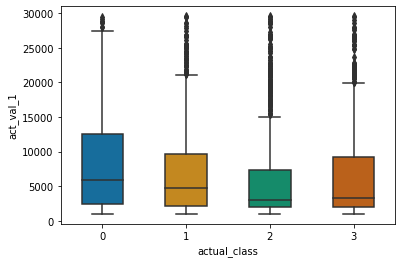

In [ ]:
# To see how closely the hidden node activation values correlate with the class labels
# Let us use seaborn for the boxplots this time.
bplot = sns.boxplot(y='act_val_1', x='actual_class', 
                 data=activation_df[['act_val_1','actual_class']], 
                 width=0.5,
                 palette="colorblind")

In [ ]:
# displaying the range of activation values for each class labels
activation_df.groupby("actual_class")["act_val_1"].apply(lambda x: [round(min(x.tolist()),2),
 round(max(x.tolist()),2)]).reset_index().rename(columns={"act_val_1": "range_of_act_values"})

,actual_class,range_of_act_values
0,0,"[1017, 29445]"
1,1,"[1015, 29536]"
2,2,"[1017, 29533]"
3,3,"[1015, 29525]"


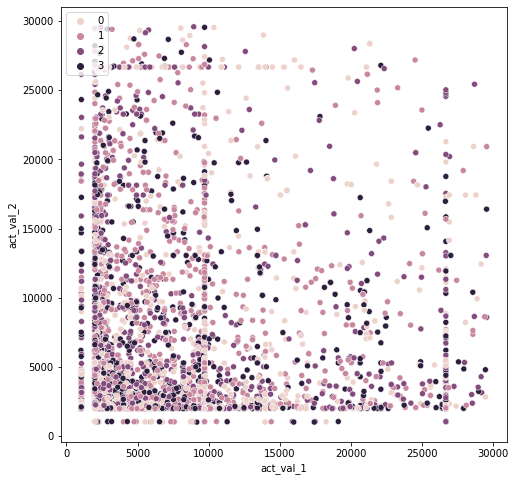

In [ ]:
plt.figure(figsize=(8, 8))
color = sns.color_palette("hls", 10)
sns.scatterplot(x="act_val_1", y="act_val_2", hue="actual_class", data = activation_df, legend="full")
plt.legend(loc='upper left');

In [ ]:
from sklearn.decomposition import PCA
# Separating out the features
features = [*activation_data][1:] # ['pix_val_0', 'pix_val_1',...]
x = activation_df.loc[:, features].values 

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf

,principal component 1,principal component 2
0,-10761.764220,-1293.448573
1,-1515.007212,10101.971050
2,-10108.414865,-6280.990470
3,-10187.796959,-3948.529825
4,-9262.236228,-6651.212531
...,...,...
5695,-10917.264718,-774.545504
5696,-1143.423281,5355.734094
5697,1248.678467,12580.409127
5698,-14333.096426,2699.126744


In [ ]:
activation_pca_df = pd.concat([principalDf, activation_df[['actual_class']]], axis = 1)

In [ ]:
activation_pca_df.head().round(3)

,principal component 1,principal component 2,actual_class
0,-10761.764,-1293.449,0
1,-1515.007,10101.971,1
2,-10108.415,-6280.990,2
3,-10187.797,-3948.530,1
4,-9262.236,-6651.213,3


In [ ]:
pca.explained_variance_ratio_

array([0.083, 0.045])

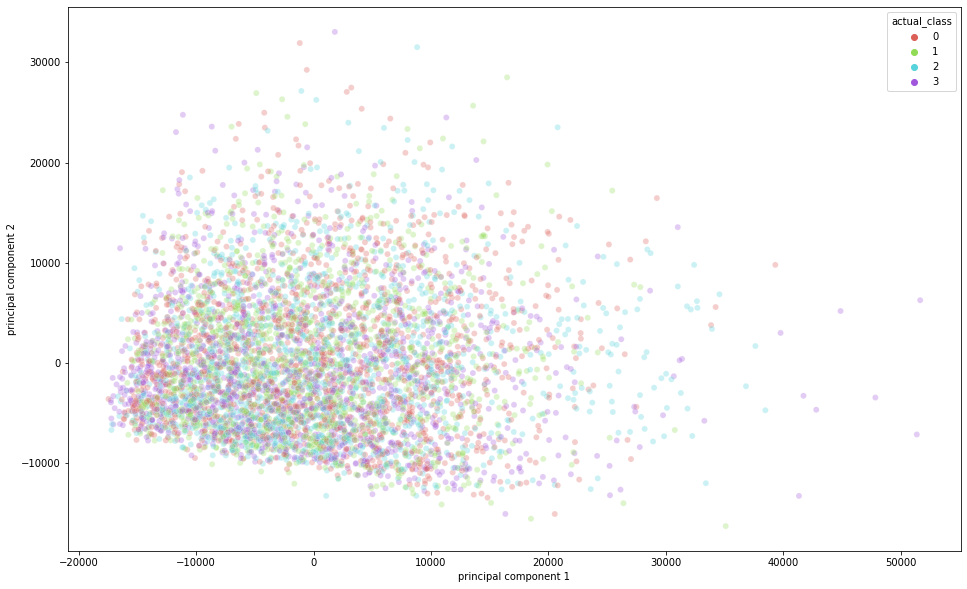

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="actual_class",
    palette=sns.color_palette("hls", 4),
    data=activation_pca_df,
    legend="full",
    alpha=0.3
);